In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata, on ="Mouse ID")

# Display the data table for preview
mouse_study

mouse_study = pd.DataFrame(mouse_study
                           )

In [2]:
# Checking the number of mice. 
len(mouse_metadata["Mouse ID"].value_counts())
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_number= mouse_study["Mouse ID"].nunique()
len(mouse_study["Mouse ID"].value_counts())
    

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            1
          5          47.570392           0                 Propriva      Female  21          26            1
          10         49.880528           0                 Propriva      Female  21          26            1
          15         53.442020           0                 Propriva      Female  21          26            1
          20         54.657650           1                 Propriva      Female  21          26            1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = 'first')

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study.count()
nummice = clean_mouse_study.count()
nummice.round()



Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
drug_groups

In [9]:
# average of tumor volume
average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)
average_tv


Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.39
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# median of tumor volume
median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)
median_tv

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.91
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#variance of tumor volume
variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)
variance_tv

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.14
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# standard deviation of tumor volume
StdDev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)
StdDev_tv

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.57
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)
SEM_tv

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.53
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [14]:

Drug_summarydf = pd.DataFrame({ "Mean Tumor Volume":average_tv, 
                                    "Median Tumor Volume": median_tv, 
                                    "Variance Tumor Volume": variance_tv, 
                                    "Standard Deviation Tumor Volume":StdDev_tv,
                                     "SEM Tumor Volume":SEM_tv})

Drug_summarydf

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts


In [15]:
#Mouse count for each drug regimen
drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_regimen_ct

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Mice count')

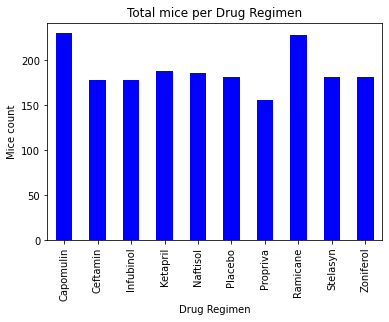

In [16]:
group_mice = clean_mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
group_mice.plot.bar( color = 'blue')

plt.title("Total mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Mice count')


In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice = np.array(mouse_study.groupby(['Drug Regimen']).count()['Mouse ID'])
x_axis =np.arange(len(mice))
mice

array([230, 178, 178, 188, 186, 181, 161, 228, 181, 182], dtype=int64)

Text(0.5, 1.0, 'Total Mice for each drug regimen pyplot')

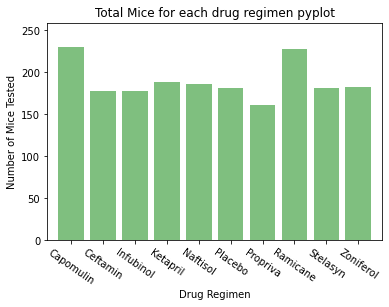

In [18]:
plt.bar(x_axis, mice, color ='green', alpha = 0.5, align ='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
plt.xticks(rotation= 325)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel('Drug Regimen')
plt.ylim(0,max(x_axis) +250)
plt.ylabel("Number of Mice Tested")
plt.title('Total Mice for each drug regimen pyplot')


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()
mouse_sex =(mouse_sex/nummice)*100 
mouse_sex.round()
mouse_sex




,Age_months,Drug Regimen,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Sex,,,,,,,,
Female,49.258475,49.258475,49.258475,49.258475,NaN,49.258475,49.258475,49.258475
Male,50.741525,50.741525,50.741525,50.741525,NaN,50.741525,50.741525,50.741525


<AxesSubplot:title={'center':'Male Vs Female Distribution'}, ylabel='Mouse ID'>

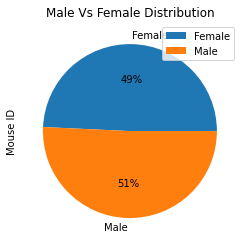

In [20]:
mouse_sex.plot(kind = 'pie', y = 'Mouse ID', title ='Male Vs Female Distribution',autopct="%.0f%%")
# pie_colors= ['red', 'blue']
# explode =(0,0)
# pie_labels= ['Females','Males']
# plt.pie(mouse_piepd, explode=explode, labels=pie_labels, colors=pie_colors,autopct="%1.1f%%", shadow=True, startangle=140)
#  mouse_piepd.set_ylabel("")
#  mouse_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))?


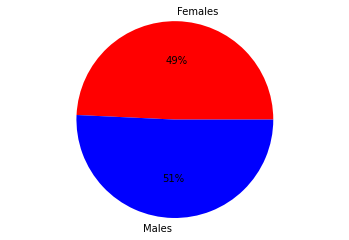

In [21]:
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()
mouse_sex =(mouse_sex/nummice)*100 
mouse_sex.round()
pie_labels= ['Females', 'Males']
sizes= np.array(clean_mouse_study.groupby(["Sex"]).count()["Mouse ID"]).round()
pie_colors= ['red', 'blue']
explode= (0, 0)
plt.pie(sizes, explode=explode, labels=pie_labels, colors=pie_colors,
        autopct="%.0f%%")
plt.axis('equal')
plt.show()

# Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_drugregimen = mouse_study.groupby(["Mouse ID"])['Timepoint'].max()
max_drugregimen


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [23]:
max_drugregimendf =pd.DataFrame(max_drugregimen)
clean_mouse_studydf = pd.DataFrame(clean_mouse_study)


In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorvol_df =pd.merge(max_drugregimendf, clean_mouse_studydf, how = 'left', on= (['Mouse ID', 'Timepoint']))
tumorvol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [27]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
 drug_tumor_vol=tumorvol_df[(tumorvol_df['Drug Regimen']==drug)]['Tumor Volume (mm3)']

quartiles = drug_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


# add subset 
tumor_vol_data.append(drug_tumor_vol)

    
    
# Determine outliers using upper and lower bounds
outlier = drug_tumor_vol[(drug_tumor_vol>=upper_bound)|(drug_tumor_vol<lower_bound)]
print(f"{drug}'s potential outliers:{outlier}")

# Locate the rows which contain mice on each drug and get the tumor volumes

Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
